# Shreya Chowdhury
# Task 1 : Predict the percentage of an student based on the number of study hours
# The Sparks Foundation.

In [1]:
#import libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#Reading the dataset from the link given in GRIP TASK pdf
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
s_data.shape

(25, 2)

In [4]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In the dataset 25 students, study hours and marks are already given.
we have to predict the percentage of students based on no of hours the student studies.

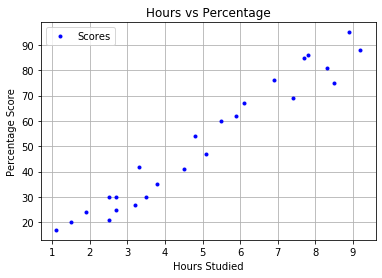

In [7]:
#Data Visualization
#Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='b.')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [8]:
#Preparing the data
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

In [9]:
#Splitting the data using Train Test Split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
#Training the Algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("The training is complete.")

The training is complete.


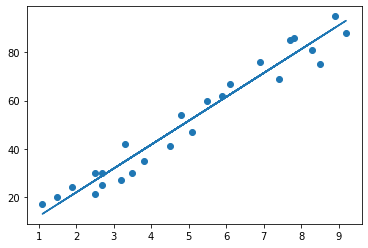

In [11]:
#Plotting on test data
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Train set Score
0.9515510725211553


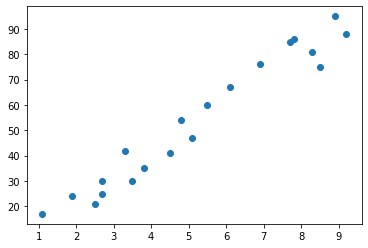

In [12]:
#Calculating the accuracy of the model on train set
plt.scatter(X_train,y_train)
print("Train set Score")
print(regressor.score(X_train,y_train))

Test Score
0.9454906892105356


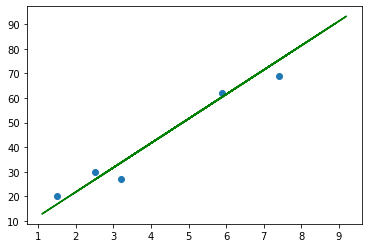

In [13]:
#Calculating the accuracy of the model on train set
print("Test Score")
print(regressor.score(X_test,y_test))
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),color="g")

In [14]:
#Making Predictions
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
#Calculating predicted score of the model for 9.25 hours
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [17]:
#Calculating the mean absolute error of the model
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
R2 Score: 0.9454906892105356


In [18]:
#Saving the model
import joblib
joblib.dump(regressor,"TASK1.pckl")

['TASK1.pckl']

In [19]:
model=joblib.load("TASK1.pckl")

# Thank You